# Regresja liniowa

Naszym Celem jest empityczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$ i go narysować.

Będzie to model, który będziemy chcieli znaleźć.

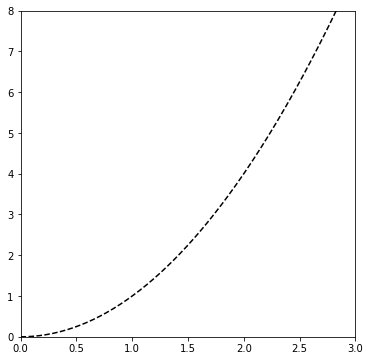

In [3]:
f = lambda x: (x**2)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać predykcję.

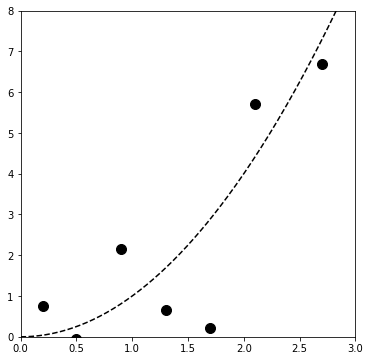

In [9]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [13]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

[2.66143829]
-1.5346304019912669


Definiujemy naszą funkcję regresji

In [14]:
# f(x) = ax + b
f_lr = lambda x: lr.coef_ * x +lr.intercept_

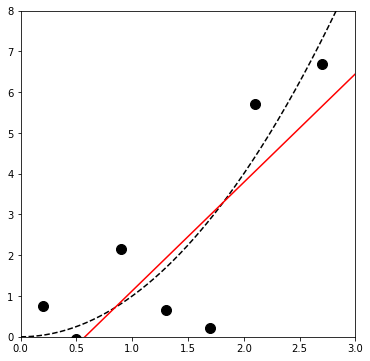

In [16]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'r');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [18]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

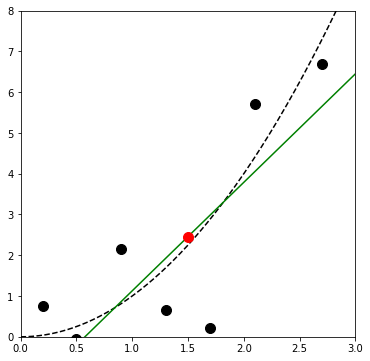

In [19]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()
# dostajemy punkt z prostej, a chcemy punkt z paraboli

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to co ona oznacza.

In [20]:
from sklearn.metrics import r2_score
print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.6246315361658494
0.3990561761606536


# Zadanie 1
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy. 

Użyj funkcji <tt>linalg.solve</tt>.

In [22]:
deg=1
A=np.vander(x, deg + 1)
A

array([[0.2, 1. ],
       [0.5, 1. ],
       [0.8, 1. ],
       [0.9, 1. ],
       [1.3, 1. ],
       [1.7, 1. ],
       [2.1, 1. ],
       [2.7, 1. ]])

In [25]:
# rozwiązujemy równanie ATAx=ATy
np.linalg.solve(np.dot(np.transpose(A),A), np.dot(np.transpose(A),y))

array([ 2.66143829, -1.5346304 ])

# Zadanie 2
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [27]:
from scipy import optimize


In [35]:
def f(x):
    x1, y1 = x
    return ((x1+1)**2 + y1**2)


x0 = np.array((1,1))
optimize.fmin_cg(f, x0)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 12
         Gradient evaluations: 3


array([-1.00000010e+00, -4.94545107e-08])

# Zadanie 3
Zdefiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [43]:
# funkcja kosztów
def compute_error(arg):
    a,b = arg
    return np.sum(y - (a*x + b)**2)

# Zadanie 4
Zminimalizuj funkcją $\mathrm{compute\_error}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [45]:
# funkcja kosztów w punkcie (1,2)
compute_error((1,2))

-75.95037266848547

# Zadanie 5
Zdefiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [46]:
def compute_error_l(arg):
    a,b = arg
    return np.sum(np.abs(y - (a*x + b)))

# Zadanie 6
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [47]:
compute_error_l((1,2))

18.505431202583914

# Zadanie 7
Wykonaj dwie powyższe regresję na danych z wartością odstającą.


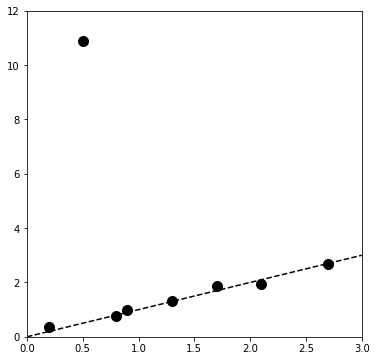

In [48]:
f = lambda x: (x)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))/5
y[1]=y[1]+10
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [50]:
points = np.column_stack((x,y))
points

array([[ 0.2       ,  0.34517928],
       [ 0.5       , 10.88348973],
       [ 0.8       ,  0.77211972],
       [ 0.9       ,  0.99784473],
       [ 1.3       ,  1.31481078],
       [ 1.7       ,  1.88640241],
       [ 2.1       ,  1.93254543],
       [ 2.7       ,  2.66124625]])

In [51]:
x0 = np.array((1,1))
optimize.fmin_cg(compute_error, x0)

Optimization terminated successfully.
         Current function value: -3184394021627270656.000000
         Iterations: 1
         Function evaluations: 64
         Gradient evaluations: 16


array([3.03793060e+08, 1.95926069e+08])

In [52]:
x0 = np.array((1,1))
optimize.fmin_cg(compute_error_l, x0)

         Current function value: 10.794005
         Iterations: 6
         Function evaluations: 311
         Gradient evaluations: 77


array([0.92331321, 0.14935898])